In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
x=np.linspace(-5.0,5.0,100)
y=np.sqrt(10**2-x**2)

In [45]:
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [46]:
x1=np.linspace(-5.0,5.0,100)
y1=np.sqrt(5**2-x1**2)

In [47]:
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

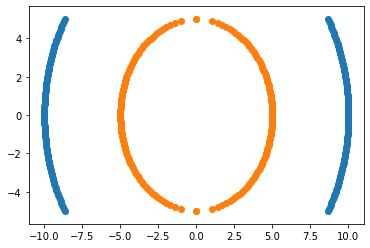

In [48]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [49]:
df1=pd.DataFrame(np.vstack([y,x]).T,columns=['x1','x2'])
df1['y']=0

In [50]:
df2=pd.DataFrame(np.vstack([y1,x1]).T,columns=['x1','x2'])
df2['y']=1

In [51]:
df=df1.append(df2)
df.head(3)

,x1,x2,y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0


In [52]:
# Training and test data
# independent and dependent features
x=df.iloc[:,:2]
y=df.y

In [53]:
x

,x1,x2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596
...,...,...
195,-1.969049,-4.59596
196,-1.714198,-4.69697
197,-1.406908,-4.79798
198,-0.999949,-4.89899


In [54]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: y, Length: 400, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [56]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear')
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
from sklearn.metrics import accuracy_score
y_pred=classifier.predict(x_test)

In [58]:
accuracy_score(y_test,y_pred)

0.45

In [59]:
df.head()

,x1,x2,y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


# Polynomial kernel

In [60]:
# we need to find components for the polynomial kernel
# x1,x2,x1_square,x2_square,x1*x2
df['x1_square']=df['x1']**2
df['x2_square']=df['x2']**2
df['x1*x2']=(df['x1']*df['x2'])
df.head()

,x1,x2,y,x1_square,x2_square,x1*x2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [61]:
x=df[['x1','x2','x1_square','x1*x2']]
y=df['y']

In [62]:
x

,x1,x2,x1_square,x1*x2
0,8.660254,-5.00000,75.000000,-43.301270
1,8.717792,-4.89899,75.999898,-42.708375
2,8.773790,-4.79798,76.979390,-42.096467
3,8.828277,-4.69697,77.938476,-41.466150
4,8.881281,-4.59596,78.877155,-40.818009
...,...,...,...,...
195,-1.969049,-4.59596,3.877155,9.049671
196,-1.714198,-4.69697,2.938476,8.051537
197,-1.406908,-4.79798,1.979390,6.750316
198,-0.999949,-4.89899,0.999898,4.898740


In [63]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: y, Length: 400, dtype: int64

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<function matplotlib.pyplot.show(*args, **kw)>

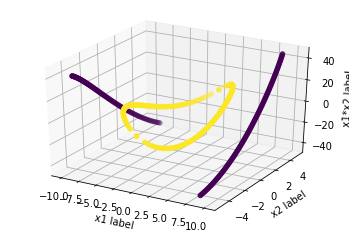

In [66]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['x1'],df['x2'],df['x1']*df['x2'],c=df['y'],cmap='viridis')
ax.set_xlabel('x1 label')
ax.set_ylabel('x2 label')
ax.set_zlabel('x1*x2 label')
plt.show

In [67]:
classifier=SVC(kernel='linear')
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
y_pred=classifier.predict(x_test)

In [69]:
accuracy_score(y_test,y_pred)

1.0